In [1]:
# Stephen.Griffies@noaa.gov 

In [2]:
import matplotlib.pyplot as plt
#import matplotlib.ticker as mticker
import numpy as np
import netCDF4
import cmocean
import xarray as xr
import cartopy.crs as ccrs
import mplsettings

#import cartopy.crs as ccrs
#from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
%matplotlib inline

In [3]:
#dirstix = "/net2/rnd/dev/stixfonts/fonts/static_ttf"
dirstix = "../../common/static_ttf"

import matplotlib.font_manager as font_manager
for font in font_manager.findSystemFonts(dirstix):
    font_manager.fontManager.addfont(font)

# Set font family globally
plt.rcParams['font.family'] = 'STIX Two Text'

In [4]:
# static file 
#fname_static = "/net/smg/OWG/CM4_highres/grids/p125/ocean_annual.static.nc"
fname_static = "../../common/CM4X_p125/ocean_annual.static.nc"

static = xr.open_mfdataset(fname_static)
static = static.assign_coords({'geolon': static['geolon'], 'geolat': static['geolat']})

deptho = static['deptho']
mask   = deptho/deptho
hfgeou = static['hfgeou'] * mask 
areao  = static['areacello'] * mask 

In [5]:
# 1/8th degree tideamp
#fname_tide = "/net/smg/OWG/CM4_highres/grids/p125/tidal_amplitude_TPXO9_OM4p125.v20200922.nc"
fname_tide = "tidal_amplitude_TPXO9_OM4p125.v20200922.nc"

tide_model = xr.open_mfdataset(fname_tide)
tideamp = tide_model['tideamp']
tideamp_masked = np.where(tideamp >0., tideamp, np.nan)

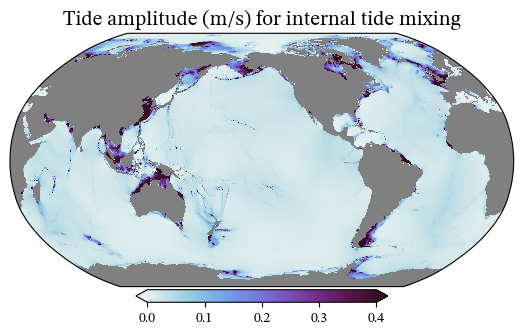

In [6]:
#MOM  

vmax=.4
vmin=0.0
field = tideamp

fig, axis = plt.subplots(nrows=1, ncols=1, figsize=(6.5,4.0),
             subplot_kw={'projection': ccrs.Robinson(central_longitude=-150)})

p=xr.plot.pcolormesh(field, ax=axis, x="lon", y="lat",
                     vmin=vmin, vmax=vmax,
                     transform=ccrs.PlateCarree(), 
                     cmap=cmocean.cm.dense,
                     add_colorbar=False
                    )

plt.gca().set_facecolor('gray')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
cbar = plt.colorbar(p,pad=0.01,spacing='uniform', extend='both', shrink=0.5,orientation='horizontal')
plt.title('Tide amplitude (m/s) for internal tide mixing', fontsize=15) 
plt.show()
fig.savefig('FigA5_CM4Xp125_tideamp.jpg', bbox_inches='tight', dpi=400, format='jpeg')